<a href="https://colab.research.google.com/github/y-patankar/CPSC597/blob/main/SMOTE%2BAutoencoder(final).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d mlg-ulb/creditcardfraud
!unzip creditcardfraud.zip

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
 88% 58.0M/66.0M [00:00<00:00, 74.2MB/s]
100% 66.0M/66.0M [00:00<00:00, 75.4MB/s]
Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras import layers, Model
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve

# Load and prepare data
data = pd.read_csv("creditcard.csv")
X = data.drop("Class", axis=1)
y = data["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SMOTE for balancing the dataset
smote = SMOTE(random_state=20)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Normalize the data
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Define the autoencoder architecture
input_dim = X_train_resampled.shape[1]
input_layer = layers.Input(shape=(input_dim,))
encoded = layers.Dense(64, activation='relu')(input_layer)
encoded = layers.Dense(32, activation='relu')(encoded)
decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(input_dim, activation='sigmoid')(decoded)
autoencoder = Model(input_layer, decoded)
encoder = Model(input_layer, encoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_train_resampled, X_train_resampled, epochs=10, batch_size=256)

# Encode the data
X_train_encoded = encoder.predict(X_train_resampled)
X_test_encoded = encoder.predict(X_test)

# Train and evaluate a classifier
classifier = tf.keras.Sequential([
    layers.Dense(32, activation='relu', input_dim=32),
    layers.Dense(1, activation='sigmoid')
])
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
classifier.fit(X_train_encoded, y_train_resampled, epochs=20, batch_size=128, validation_data=(X_test_encoded, y_test))

# Predict probabilities
probabilities = classifier.predict(X_test_encoded).flatten()

# Compute precision-recall pairs for different probability thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, probabilities)

# Find the threshold that balances precision and recall
threshold_optimal = thresholds[np.argmax(precisions + recalls)]
print("Optimal threshold:", threshold_optimal)

# Apply the optimal threshold to make final predictions
y_pred_optimal = (probabilities >= threshold_optimal).astype(int)

# Print the updated confusion matrix and classification report
print(confusion_matrix(y_test, y_pred_optimal))
print(classification_report(y_test, y_pred_optimal,digits=4))

Epoch 1/10
1777/1777 [==============================] - 5s 2ms/step - loss: 0.7192
Epoch 2/10
1777/1777 [==============================] - 5s 3ms/step - loss: 0.6821
Epoch 3/10
1777/1777 [==============================] - 5s 3ms/step - loss: 0.6794
Epoch 4/10
1777/1777 [==============================] - 4s 2ms/step - loss: 0.6786
Epoch 5/10
1777/1777 [==============================] - 5s 3ms/step - loss: 0.6783
Epoch 6/10
1777/1777 [==============================] - 5s 3ms/step - loss: 0.6781
Epoch 7/10
1777/1777 [==============================] - 4s 2ms/step - loss: 0.6780
Epoch 8/10
1777/1777 [==============================] - 5s 3ms/step - loss: 0.6778
Epoch 9/10
1777/1777 [==============================] - 5s 3ms/step - loss: 0.6778
Epoch 10/10
1781/1781 [==============================] - 2s 1ms/step
Epoch 1/20
3554/3554 [==============================] - 8s 2ms/step - loss: 0.0972 - accuracy: 0.9641 - val_loss: 0.0265 - val_accuracy: 0.9953
Epoch 2/20
3554/3554 [==================

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras import layers, Model
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve

# Load and prepare data
data = pd.read_csv("creditcard.csv")
X = data.drop("Class", axis=1)
y = data["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SMOTE for balancing the dataset
smote = SMOTE(random_state=20)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Normalize the data
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Define the autoencoder architecture
input_dim = X_train_resampled.shape[1]
input_layer = layers.Input(shape=(input_dim,))
encoded = layers.Dense(64, activation='relu')(input_layer)
encoded = layers.Dense(32, activation='relu')(encoded)
decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(input_dim, activation='sigmoid')(decoded)
autoencoder = Model(input_layer, decoded)
encoder = Model(input_layer, encoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_train_resampled, X_train_resampled, epochs=10, batch_size=256)

# Encode the data
X_train_encoded = encoder.predict(X_train_resampled)
X_test_encoded = encoder.predict(X_test)

# Train and evaluate a classifier
classifier = tf.keras.Sequential([
    layers.Dense(32, activation='relu', input_dim=32),
    layers.Dense(1, activation='sigmoid')
])
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
classifier.fit(X_train_encoded, y_train_resampled, epochs=10, batch_size=128, validation_data=(X_test_encoded, y_test))

# Predict probabilities
probabilities = classifier.predict(X_test_encoded).flatten()

# Compute precision-recall pairs for different probability thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, probabilities)

# Find the threshold that balances precision and recall
threshold_optimal = thresholds[np.argmax(precisions + recalls)]
print("Optimal threshold:", threshold_optimal)

# Apply the optimal threshold to make final predictions
y_pred_optimal = (probabilities >= threshold_optimal).astype(int)

# Print the updated confusion matrix and classification report
print(confusion_matrix(y_test, y_pred_optimal))
print(classification_report(y_test, y_pred_optimal,digits=4))

Epoch 1/10
1777/1777 [==============================] - 5s 2ms/step - loss: 0.7243
Epoch 2/10
1777/1777 [==============================] - 4s 2ms/step - loss: 0.6885
Epoch 3/10
1777/1777 [==============================] - 6s 3ms/step - loss: 0.6865
Epoch 4/10
1777/1777 [==============================] - 4s 2ms/step - loss: 0.6861
Epoch 5/10
1777/1777 [==============================] - 4s 2ms/step - loss: 0.6858
Epoch 6/10
1777/1777 [==============================] - 6s 3ms/step - loss: 0.6856
Epoch 7/10
1777/1777 [==============================] - 4s 2ms/step - loss: 0.6855
Epoch 8/10
1777/1777 [==============================] - 4s 3ms/step - loss: 0.6854
Epoch 9/10
1777/1777 [==============================] - 6s 3ms/step - loss: 0.6853
Epoch 10/10
1781/1781 [==============================] - 2s 1ms/step
Epoch 1/10
3554/3554 [==============================] - 9s 2ms/step - loss: 0.0781 - accuracy: 0.9720 - val_loss: 0.0342 - val_accuracy: 0.9942
Epoch 2/10
3554/3554 [==================

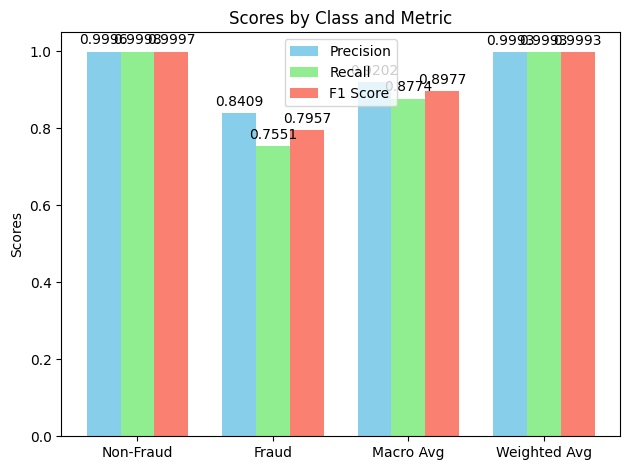

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Data from your classification report
labels = ['Non-Fraud', 'Fraud', 'Macro Avg', 'Weighted Avg']
precision = [0.9996, 0.8909, 0.9202, 0.9993]
recall = [0.9998, 0.7851, 0.8774, 0.9993]
f1_score = [0.9997, 0.8257, 0.8977, 0.9993]

x = np.arange(len(labels))  # Label locations
width = 0.25  # Width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precision', color='skyblue')
rects2 = ax.bar(x, recall, width, label='Recall', color='lightgreen')
rects3 = ax.bar(x + width, f1_score, width, label='F1 Score', color='salmon')

# Add text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by Class and Metric')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Function to add a label inside each bar
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)
add_labels(rects3)

fig.tight_layout()
plt.show()


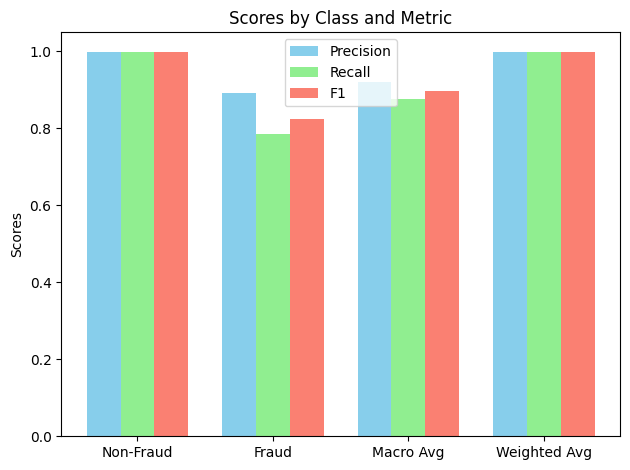

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Data from your classification report
labels = ['Non-Fraud', 'Fraud', 'Macro Avg', 'Weighted Avg']
precision = [0.9996, 0.8909, 0.9202, 0.9993]
recall = [0.9998, 0.7851, 0.8774, 0.9993]
f1_score = [0.9997, 0.8257, 0.8977, 0.9993]

x = np.arange(len(labels))  # Label locations
width = 0.25  # Width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precision', color='skyblue')
rects2 = ax.bar(x, recall, width, label='Recall', color='lightgreen')
rects3 = ax.bar(x + width, f1_score, width, label='F1', color='salmon')

# Add text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by Class and Metric')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()


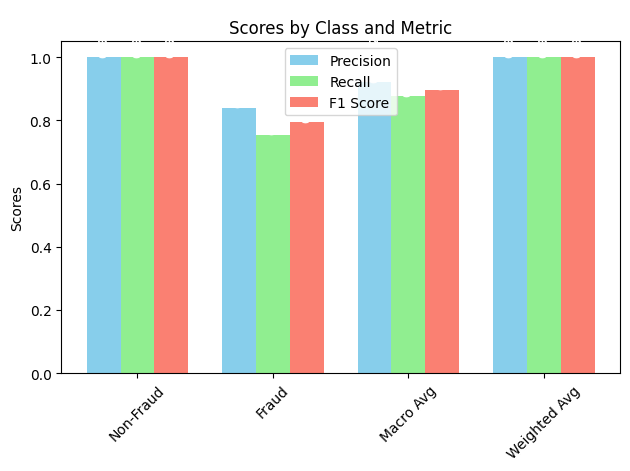

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Data from your classification report
labels = ['Non-Fraud', 'Fraud', 'Macro Avg', 'Weighted Avg']
precision = [0.9996, 0.8409, 0.9202, 0.9993]
recall = [0.9998, 0.7551, 0.8774, 0.9993]
f1_score = [0.9997, 0.7957, 0.8977, 0.9993]

x = np.arange(len(labels))  # Label locations
width = 0.25  # Width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precision', color='skyblue')
rects2 = ax.bar(x, recall, width, label='Recall', color='lightgreen')
rects3 = ax.bar(x + width, f1_score, width, label='F1 Score', color='salmon')

# Add text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by Class and Metric')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)  # Rotate labels if they overlap or are too long
ax.legend()

# Function to add a label vertically inside each bar
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.4f}',
                ha='center', va='bottom', rotation='vertical', color='white', fontsize=9, fontweight='bold')

add_labels(rects1)
add_labels(rects2)
add_labels(rects3)

fig.tight_layout()
plt.show()


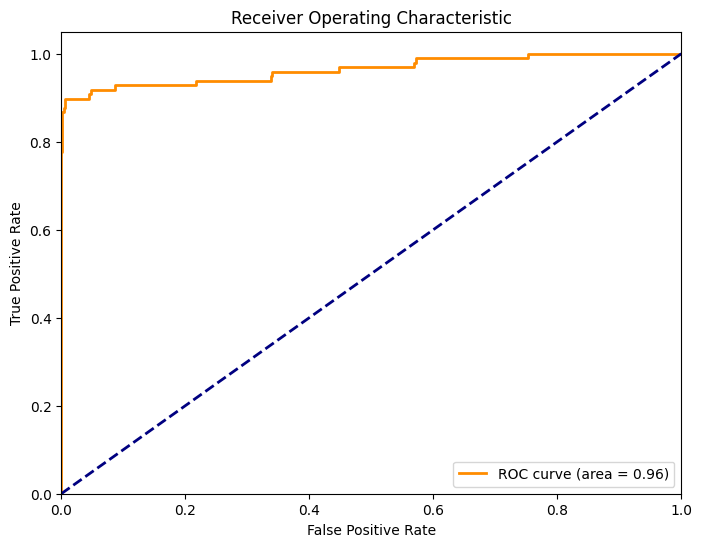

In [17]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, probabilities)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [5]:
from sklearn.metrics import classification_report

# Assuming you have y_test and y_pred_optimal from your model's predictions
report_dict = classification_report(y_test, y_pred_optimal, output_dict=True)

# Convert to DataFrame
report_df = pd.DataFrame(report_dict).transpose()


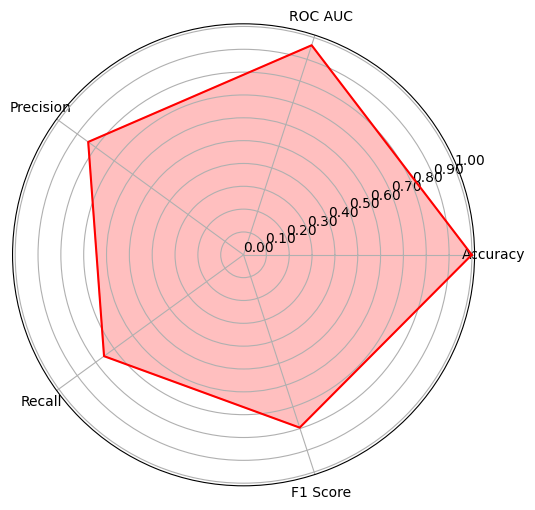

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, accuracy_score

# Assuming your predictions and actual labels are stored in y_pred_optimal and y_test

# Metrics
accuracy = accuracy_score(y_test, y_pred_optimal)
roc_auc = roc_auc_score(y_test, probabilities)  # AUC requires the probabilities, not the binary predictions
precision = report_df.at['1', 'precision']
recall = report_df.at['1', 'recall']
f1 = report_df.at['1', 'f1-score']

# Prepare data for radar chart
labels = np.array(['Accuracy', 'ROC AUC', 'Precision', 'Recall', 'F1 Score'])
stats = np.array([accuracy, roc_auc, precision, recall, f1])

# Number of variables we're plotting.
num_vars = len(labels)

# Compute angle each bar is centered on:
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop" and append the start value to the end.
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Draw the plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, stats, color='red', alpha=0.25)
ax.plot(angles, stats, color='red')  # Draw the outline of our data
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

# Setting the y-ticks to show the metric values, adjusted to 0-1 scale if necessary
ax.set_yticks(np.linspace(0, 1, 11))  # Creates 11 y-ticks from 0 to 1, adjust range as necessary
ax.set_yticklabels([f"{x:.2f}" for x in np.linspace(0, 1, 11)])  # Formats y-ticks to show as decimal values

plt.show()



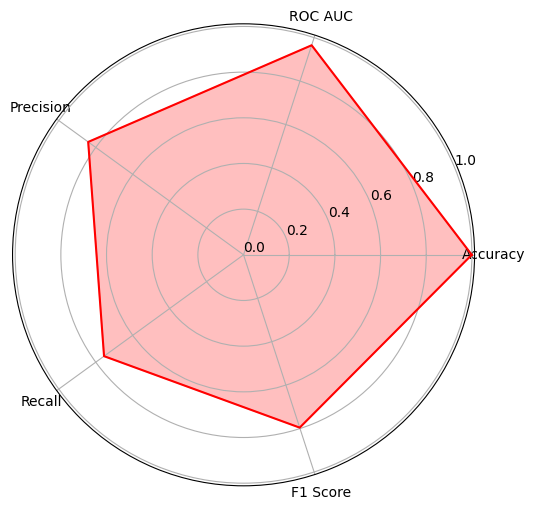

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, accuracy_score

# Assuming your predictions and actual labels are stored in y_pred_optimal and y_test

# Metrics
accuracy = accuracy_score(y_test, y_pred_optimal)
roc_auc = roc_auc_score(y_test, probabilities)
precision = report_df.at['1', 'precision']
recall = report_df.at['1', 'recall']
f1 = report_df.at['1', 'f1-score']

# Prepare data for radar chart
labels = np.array(['Accuracy', 'ROC AUC', 'Precision', 'Recall', 'F1 Score'])
stats = np.array([accuracy, roc_auc, precision, recall, f1])

# Number of variables we're plotting.
num_vars = len(labels)

# Compute angle each bar is centered on:
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop" and append the start value to the end.
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Draw the plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, stats, color='red', alpha=0.25)
ax.plot(angles, stats, color='red')  # Draw the outline of our data
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

# Set y-ticks at more appropriate intervals and improve label formatting
ax.set_yticks(np.linspace(0, 1, 6))  # Creates 6 y-ticks from 0 to 1 (0.0, 0.2, 0.4, 0.6, 0.8, 1.0)
ax.set_yticklabels([f"{x:.1f}" for x in np.linspace(0, 1, 6)])  # Formats y-ticks to show as decimal values

plt.show()


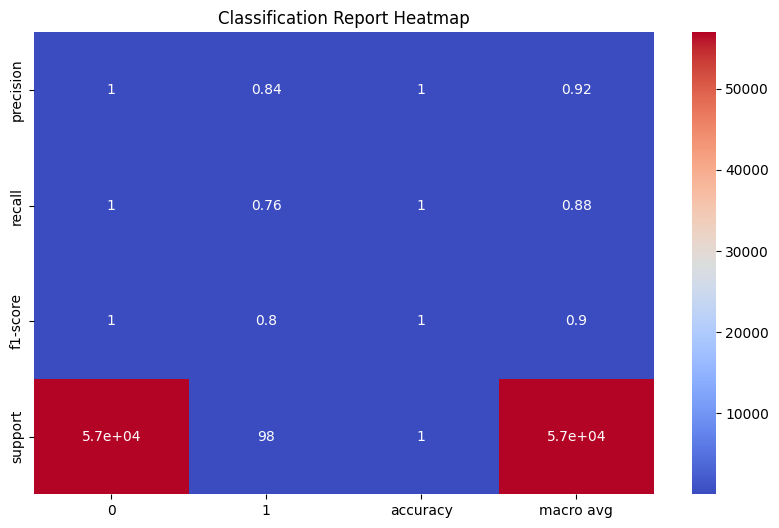

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import pandas as pd

# Generate classification report
report = classification_report(y_test, y_pred_optimal, output_dict=True)

# Convert report to DataFrame for easier plotting
report_df = pd.DataFrame(report).transpose()

# Heatmap of the classification report
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap="coolwarm")
plt.title('Classification Report Heatmap')
plt.show()


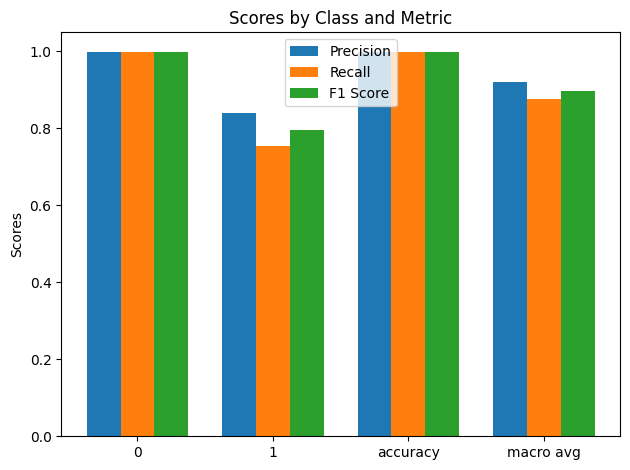

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Extract precision, recall, and F1-score
labels = list(report_df.index[:-1])  # Skip the 'accuracy' row
precision = report_df.loc[labels, 'precision']
recall = report_df.loc[labels, 'recall']
f1_score = report_df.loc[labels, 'f1-score']

x = np.arange(len(labels))  # Label locations
width = 0.25  # Width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1 Score')

# Add text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by Class and Metric')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()


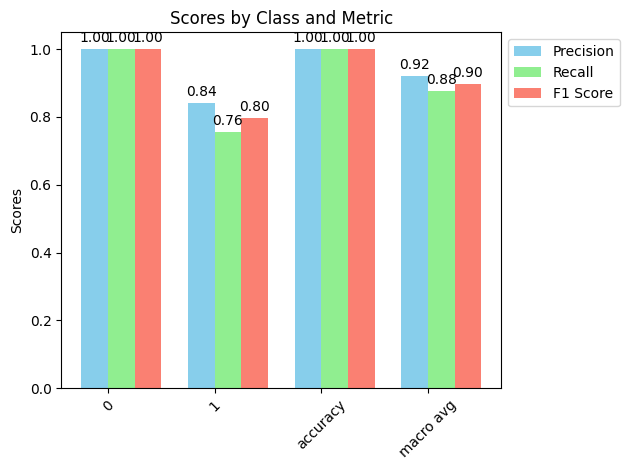

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'report_df' is defined as the DataFrame holding your classification report

# Extract precision, recall, and F1-score
labels = list(report_df.index[:-1])  # Skip the 'accuracy' row
precision = report_df.loc[labels, 'precision']
recall = report_df.loc[labels, 'recall']
f1_score = report_df.loc[labels, 'f1-score']

x = np.arange(len(labels))  # Label locations
width = 0.25  # Width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, precision, width, label='Precision', color='skyblue')
rects2 = ax.bar(x + width/2, recall, width, label='Recall', color='lightgreen')
rects3 = ax.bar(x + 1.5*width, f1_score, width, label='F1 Score', color='salmon')

# Add value labels to each bar
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)
add_labels(rects3)

# Add text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by Class and Metric')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)  # Rotate labels if they overlap or are too long
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Move the legend out of the plot

fig.tight_layout()
plt.show()


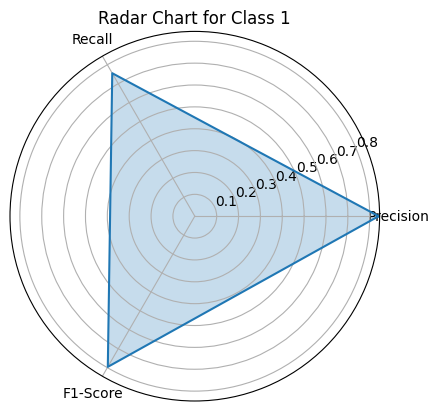

In [14]:
# Radar chart setup
categories = ['Precision', 'Recall', 'F1-Score']
N = len(categories)

# Create a radar chart for one class ('1' or another class label)
values = [report_df.at['1', 'precision'], report_df.at['1', 'recall'], report_df.at['1', 'f1-score']]
values += values[:1]  # Closing the plot

angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

fig, ax = plt.subplots(subplot_kw={'polar': True})
ax.fill(angles, values, alpha=0.25)
ax.plot(angles, values)

# Beautify the plot
plt.xticks(angles[:-1], categories)
ax.set_title('Radar Chart for Class 1')

plt.show()


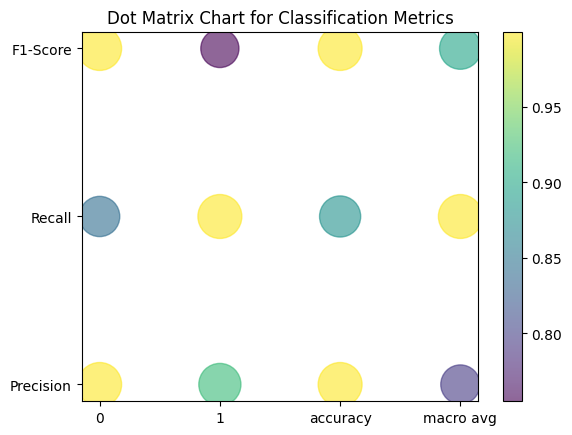

In [15]:
# Prepare data for dot matrix
metric_values = np.array([precision, recall, f1_score])
x_labels = np.repeat(np.arange(len(labels)), len(categories))
y_labels = np.tile(np.arange(len(categories)), len(labels))

fig, ax = plt.subplots()
scatter = ax.scatter(x_labels, y_labels, s=metric_values.flatten()*1000, c=metric_values.flatten(), cmap='viridis', alpha=0.6)
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticks(np.arange(len(categories)))
ax.set_yticklabels(categories)
ax.set_title('Dot Matrix Chart for Classification Metrics')

# Add a color bar
plt.colorbar(scatter)
plt.show()


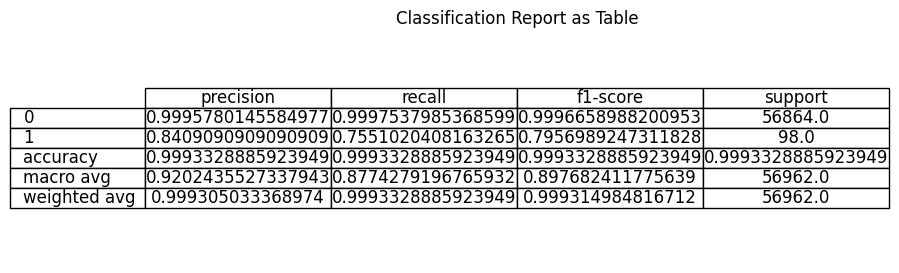

In [16]:
fig, ax = plt.subplots(figsize=(8, 3))  # Set appropriate figure size
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=report_df.values, colLabels=report_df.columns, rowLabels=report_df.index, loc='center', cellLoc='center')
the_table.auto_set_font_size(False)
the_table.set_fontsize(12)
the_table.scale(1.2, 1.2)  # May need adjustment to fit your screen
plt.title('Classification Report as Table')
plt.show()


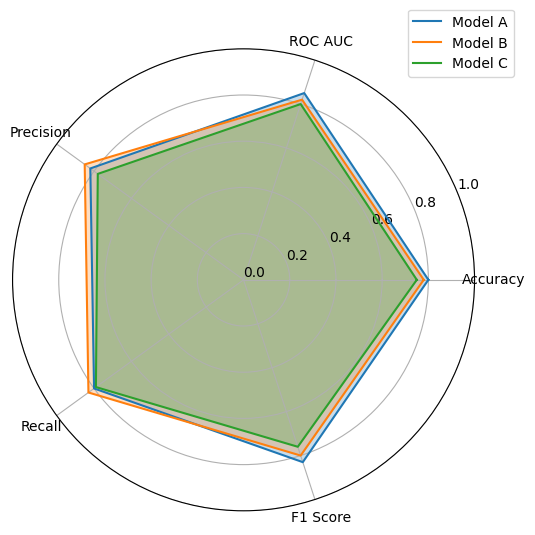

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data: Replace these with your actual metrics
model_metrics = {
    'Model A': [0.8, 0.85, 0.82, 0.80, 0.83],
    'Model B': [0.78, 0.82, 0.85, 0.83, 0.80],
    'Model C': [0.75, 0.80, 0.78, 0.79, 0.76]
}

# Labels for the metrics
labels = np.array(['Accuracy', 'ROC AUC', 'Precision', 'Recall', 'F1 Score'])

# Number of variables we're plotting.
num_vars = len(labels)

# Compute angle each bar is centered on:
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the loop

# Plotting
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Draw one line per model
for model, values in model_metrics.items():
    values += values[:1]  # Complete the loop
    ax.plot(angles, values, label=model)
    ax.fill(angles, values, alpha=0.25)

# Beautify the plot
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_yticks(np.linspace(0, 1, 6))  # Set ticks from 0 to 1
ax.set_yticklabels([f"{x:.1f}" for x in np.linspace(0, 1, 6)])

# Add a legend
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.show()


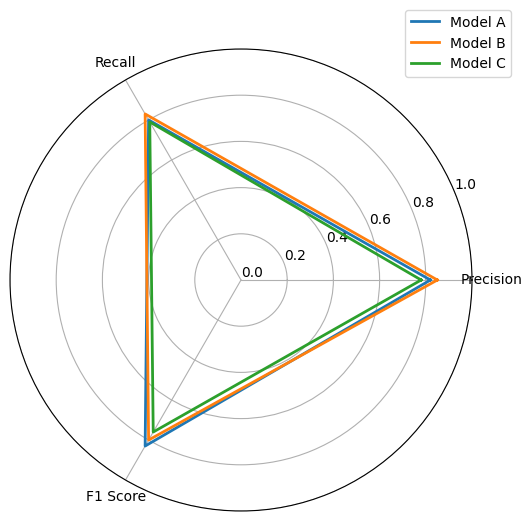

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data: Replace these with your actual metrics
model_metrics = {
    'Model A': [0.82, 0.80, 0.83],
    'Model B': [0.85, 0.83, 0.80],
    'Model C': [0.78, 0.79, 0.76]
}

# Labels for the metrics
labels = np.array(['Precision', 'Recall', 'F1 Score'])

# Number of variables we're plotting.
num_vars = len(labels)

# Compute angle each bar is centered on:
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the loop

# Plotting
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Draw one line per model with only outlines
for model, values in model_metrics.items():
    values += values[:1]  # Complete the loop
    ax.plot(angles, values, label=model, linewidth=2)  # Increase linewidth for better visibility

# Beautify the plot
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_yticks(np.linspace(0, 1, 6))  # Set ticks from 0 to 1
ax.set_yticklabels([f"{x:.1f}" for x in np.linspace(0, 1, 6)])

# Add a legend
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.show()


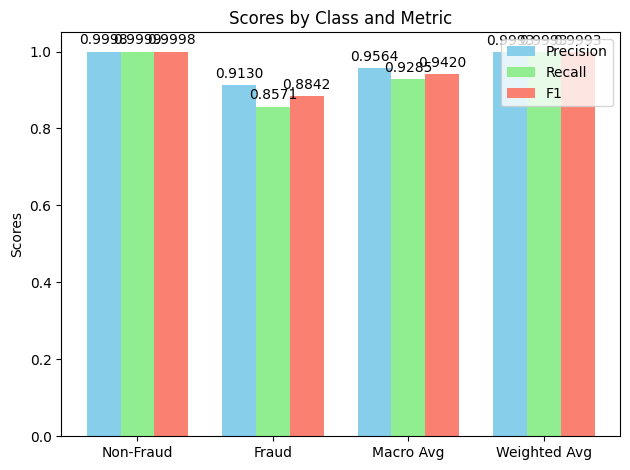

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Updated data from your classification report
labels = ['Non-Fraud', 'Fraud', 'Macro Avg', 'Weighted Avg']
precision = [0.9998, 0.9130, 0.9564, 0.9993]  # Assuming macro avg for precision calculated similarly
recall = [0.9999, 0.8571, 0.9285, 0.9993]     # Assuming macro avg for recall calculated similarly
f1_score = [0.9998, 0.8842, 0.9420, 0.9993]   # Assuming macro avg for f1 calculated similarly

x = np.arange(len(labels))  # Label locations
width = 0.25  # Width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precision', color='skyblue')
rects2 = ax.bar(x, recall, width, label='Recall', color='lightgreen')
rects3 = ax.bar(x + width, f1_score, width, label='F1', color='salmon')

# Add text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by Class and Metric')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Add value labels to each bar for clarity
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Apply value labels function
add_value_labels(rects1)
add_value_labels(rects2)
add_value_labels(rects3)

fig.tight_layout()
plt.show()


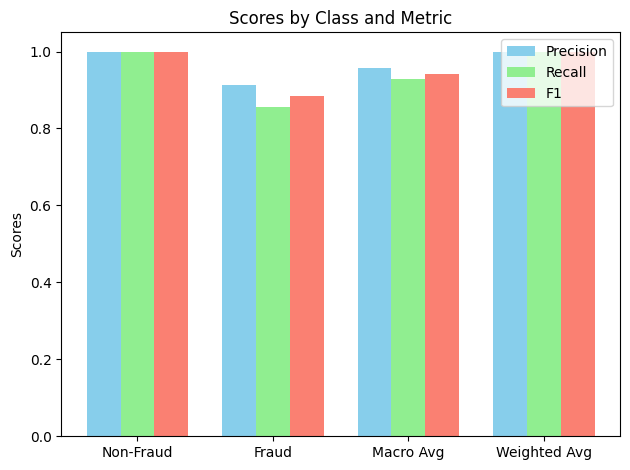

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Updated data from your classification report
labels = ['Non-Fraud', 'Fraud', 'Macro Avg', 'Weighted Avg']
precision = [0.9998, 0.9130, 0.9564, 0.9993]  # Updated values based on your data
recall = [0.9999, 0.8571, 0.9285, 0.9993]
f1_score = [0.9998, 0.8842, 0.9420, 0.9993]

x = np.arange(len(labels))  # Label locations
width = 0.25  # Width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precision', color='skyblue')
rects2 = ax.bar(x, recall, width, label='Recall', color='lightgreen')
rects3 = ax.bar(x + width, f1_score, width, label='F1', color='salmon')

# Add text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by Class and Metric')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()
